### importing liabrary

Date Class

In [2]:
import QuantLib as ql
import pandas as pd

In [3]:
date = ql.Date(15, 1, 2024)
print(date)
print("%d-%d-%d" %(date.dayOfMonth(),date.month(),
date.year()))

January 15th, 2024
15-1-2024


In [4]:
print("%d-%d-%d" %(date.year(),date.month(),date.dayOfMonth()))

2024-1-15


In [5]:
date.weekday() == ql.Monday

True

In [6]:
type(date)

QuantLib.QuantLib.Date

In [7]:
print("Subtract a day : {0}".format(date - 1))
print("Add a month: {0}".format(date + ql.Period(1, ql.Months)))

Subtract a day : January 14th, 2024
Add a month: February 15th, 2024


Calendar 

In [8]:
date = ql.Date(31, 3, 2015)
us_calendar = ql.UnitedStates(ql.UnitedStates.GovernmentBond)
italy_calendar = ql.Italy()
period = ql.Period(60, ql.Days)
raw_date = date + period
us_date = us_calendar.advance(date, period)
italy_date = italy_calendar.advance(date, period)
print("Add 60 days: {0}".format(raw_date))
print("Add 60 business days in US: {0}".format(us_date))
print("Add 60 business days in Italy: {0}".format(italy_date))

Add 60 days: May 30th, 2015
Add 60 business days in US: June 24th, 2015
Add 60 business days in Italy: June 26th, 2015


blending calendar for getting all holidays

In [9]:
joint_calendar = ql.JointCalendar(us_calendar, italy_calendar)
joint_date = joint_calendar.advance(date, period)
joint_busdays = joint_calendar.businessDaysBetween(date, joint_date)
print("Add 60 business days in US-Italy: {0}".format(joint_date))
print("Business days US-Italy: {0}".format(joint_busdays))

Add 60 business days in US-Italy: June 29th, 2015
Business days US-Italy: 60


Schedule

In [10]:
effective_date = ql.Date(1, 1, 2015)
termination_date = ql.Date(1, 1, 2016)
tenor = ql.Period(ql.Monthly)
calendar = ql.UnitedStates(ql.UnitedStates.GovernmentBond)
business_convention = ql.Following
termination_business_convention = ql.Following
date_generation = ql.DateGeneration.Forward
end_of_month = False
schedule = ql.Schedule(effective_date,
termination_date,
tenor,
calendar,
business_convention,
termination_business_convention,
date_generation,
end_of_month)
pd.DataFrame({'date': list(schedule)})

,date
0,"January 2nd, 2015"
1,"February 2nd, 2015"
2,"March 2nd, 2015"
3,"April 1st, 2015"
4,"May 1st, 2015"
5,"June 1st, 2015"
6,"July 1st, 2015"
7,"August 3rd, 2015"
8,"September 1st, 2015"
9,"October 1st, 2015"


short or long stub

In [11]:
# short stub in the front
effective_date = ql.Date(1, 1, 2015)
termination_date = ql.Date(1, 1, 2016)
first_date = ql.Date(15, 1, 2015) #####
schedule = ql.Schedule(effective_date,
termination_date,
tenor,
calendar,
business_convention,
termination_business_convention,
ql.DateGeneration.Backward,
end_of_month,
first_date)
pd.DataFrame({'date': list(schedule)})

,date
0,"January 2nd, 2015"
1,"January 15th, 2015"
2,"February 2nd, 2015"
3,"March 2nd, 2015"
4,"April 1st, 2015"
5,"May 1st, 2015"
6,"June 1st, 2015"
7,"July 1st, 2015"
8,"August 3rd, 2015"
9,"September 1st, 2015"


In [12]:
# short stub at the back
effective_date = ql.Date(1, 1, 2015)
termination_date = ql.Date(1, 1, 2016)
penultimate_date = ql.Date(15, 12, 2015) ###
schedule = ql.Schedule(effective_date,
termination_date,
tenor,
calendar,
business_convention,
termination_business_convention,
ql.DateGeneration.Forward,
end_of_month,
ql.Date(),
penultimate_date)
pd.DataFrame({'date': list(schedule)})

,date
0,"January 2nd, 2015"
1,"February 2nd, 2015"
2,"March 2nd, 2015"
3,"April 1st, 2015"
4,"May 1st, 2015"
5,"June 1st, 2015"
6,"July 1st, 2015"
7,"August 3rd, 2015"
8,"September 1st, 2015"
9,"October 1st, 2015"


In [13]:
dates = [ql.Date(2,1,2015), ql.Date(2, 2,2015),
ql.Date(2,3,2015), ql.Date(1,4,2015),
ql.Date(1,5,2015), ql.Date(1,6,2015),
ql.Date(1,7,2015), ql.Date(3,8,2015),
ql.Date(1,9,2015), ql.Date(18,10,2015),
ql.Date(2,11,2015), ql.Date(1,12,2015),
ql.Date(4,1,2016)]
rolling_convention = ql.Following
schedule = ql.Schedule(dates, calendar,
rolling_convention)
pd.DataFrame({'date': list(schedule)})

,date
0,"January 2nd, 2015"
1,"February 2nd, 2015"
2,"March 2nd, 2015"
3,"April 1st, 2015"
4,"May 1st, 2015"
5,"June 1st, 2015"
6,"July 1st, 2015"
7,"August 3rd, 2015"
8,"September 1st, 2015"
9,"October 18th, 2015"


Interest Rate

In [14]:
annual_rate = 0.05
day_count = ql.ActualActual(ql.ActualActual.ISDA)
compound_type = ql.Compounded
frequency = ql.Annual
interest_rate = ql.InterestRate(annual_rate,
day_count,
compound_type,
frequency)
print(interest_rate)

5.000000 % Actual/Actual (ISDA) Annual compounding


In [15]:
# compound_factor and discount_factor
t = 2.0  #n
print(interest_rate.compoundFactor(t))   # (1+r)^n
print(interest_rate.discountFactor(t))   #1/(1+r)^n

1.1025
0.9070294784580498


In [16]:
#compounding frequency
new_frequency = ql.Semiannual
new_interest_rate = interest_rate.equivalentRate(compound_type, new_frequency, t)
print(new_interest_rate)

4.939015 % Actual/Actual (ISDA) Semiannual compounding


### Practice 2

In [17]:
import QuantLib as ql
from QuantLib import *
import pandas as pd
us_calendar = ql.UnitedStates(ql.UnitedStates.GovernmentBond)
euro_calendar = ql.TARGET()
joint_calendar = ql.JointCalendar(us_calendar, euro_calendar)


In [18]:
effective_date = ql.Date(15, 3, 2023)
termination_date = ql.Date(15, 3, 2033)
tenor = ql.Period(ql.Semiannual)
calendar = joint_calendar
business_convention = ql.Following
termination_business_convention = ql.Following
date_generation = ql.DateGeneration.Forward
end_of_month = False
schedule = ql.Schedule(effective_date,
termination_date,
tenor,
calendar,
business_convention,
termination_business_convention,
date_generation,
end_of_month)
pd.DataFrame({'date': list(schedule)})

,date
0,"March 15th, 2023"
1,"September 15th, 2023"
2,"March 15th, 2024"
3,"September 16th, 2024"
4,"March 17th, 2025"
5,"September 15th, 2025"
6,"March 16th, 2026"
7,"September 15th, 2026"
8,"March 15th, 2027"
9,"September 15th, 2027"


In [19]:
annual_rate_leg1 = 0.0508
day_count = ql.Thirty360(ql.Thirty360.BondBasis)
compound_type = ql.Compounded
frequency = ql.Semiannual
interest_rate_leg1 = ql.InterestRate(annual_rate_leg1,
day_count,
compound_type,
frequency)
print(interest_rate_leg1)

5.080000 % 30/360 (Bond Basis) Semiannual compounding


In [20]:
annual_rate_leg2 = 0.06129
day_count = ql.Thirty360(ql.Thirty360.BondBasis)
compound_type = ql.Compounded
frequency = ql.Semiannual
interest_rate_leg2 = ql.InterestRate(annual_rate_leg2,
day_count,
compound_type,
frequency)
print(interest_rate_leg2)

6.129000 % 30/360 (Bond Basis) Semiannual compounding


In [21]:
notional=10000000
day_count = ql.Thirty360(ql.Thirty360.BondBasis)
eur_leg = ql.FixedRateLeg(schedule, day_count, [notional], [interest_rate_leg1.rate()])

# Calculate Cash Flows
cash_flows = [cf.amount() for cf in eur_leg]

# Display Cash Flows
cash_flow_dates = [cf.date().ISO() for cf in eur_leg]
cash_flow_data = {'Date': cash_flow_dates, 'Cash Flow': cash_flows}
cash_flow_df_leg1 = pd.DataFrame(cash_flow_data)
print(cash_flow_df_leg1)


          Date      Cash Flow
0   2023-09-15  254000.000000
1   2024-03-15  254000.000000
2   2024-09-16  255411.111111
3   2025-03-17  255411.111111
4   2025-09-15  251177.777778
5   2026-03-16  255411.111111
6   2026-09-15  252588.888889
7   2027-03-15  254000.000000
8   2027-09-15  254000.000000
9   2028-03-15  254000.000000
10  2028-09-15  254000.000000
11  2029-03-15  254000.000000
12  2029-09-17  256822.222222
13  2030-03-15  251177.777778
14  2030-09-16  255411.111111
15  2031-03-17  255411.111111
16  2031-09-15  251177.777778
17  2032-03-15  254000.000000
18  2032-09-15  254000.000000
19  2033-03-15  254000.000000


In [22]:
notional=10566000
day_count = ql.Thirty360(ql.Thirty360.BondBasis)
US_leg = ql.FixedRateLeg(schedule, day_count, [notional], [interest_rate_leg2.rate()])

# Calculate Cash Flows
cash_flows = [cf.amount() for cf in US_leg]

# Display Cash Flows
cash_flow_dates = [cf.date().ISO() for cf in US_leg]
cash_flow_data = {'Date': cash_flow_dates, 'Cash Flow': cash_flows}
cash_flow_df_leg2 = pd.DataFrame(cash_flow_data)
print(cash_flow_df_leg2)


          Date    Cash Flow
0   2023-09-15  323795.0700
1   2024-03-15  323795.0700
2   2024-09-16  325593.9315
3   2025-03-17  325593.9315
4   2025-09-15  320197.3470
5   2026-03-16  325593.9315
6   2026-09-15  321996.2085
7   2027-03-15  323795.0700
8   2027-09-15  323795.0700
9   2028-03-15  323795.0700
10  2028-09-15  323795.0700
11  2029-03-15  323795.0700
12  2029-09-17  327392.7930
13  2030-03-15  320197.3470
14  2030-09-16  325593.9315
15  2031-03-17  325593.9315
16  2031-09-15  320197.3470
17  2032-03-15  323795.0700
18  2032-09-15  323795.0700
19  2033-03-15  323795.0700


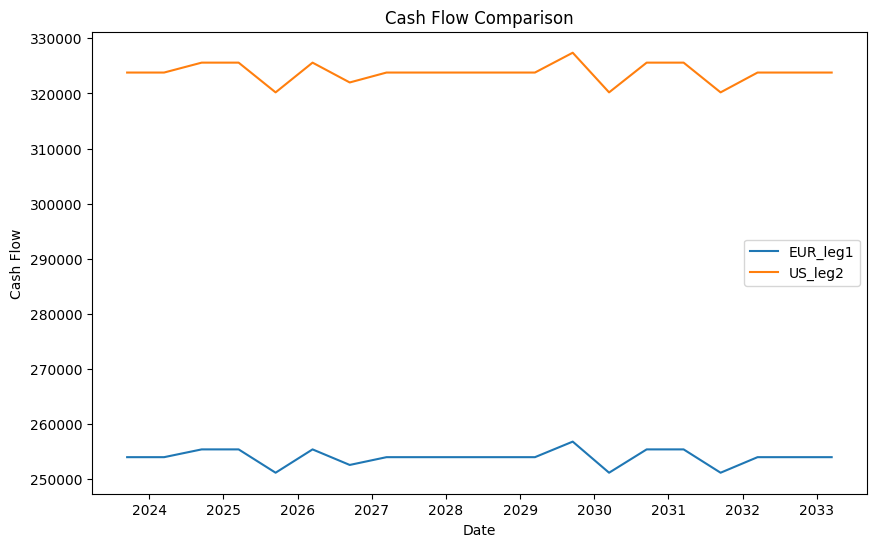

In [23]:
import matplotlib.pyplot as plt
# Merge the two dataframes on the 'Date' column
merged_df = pd.merge(cash_flow_df_leg1, cash_flow_df_leg2, on='Date', suffixes=('_df1', '_df2'))

# Convert the 'Date' column to datetime
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Date'], merged_df['Cash Flow_df1'].values, label='EUR_leg1')
plt.plot(merged_df['Date'], merged_df['Cash Flow_df2'], label='US_leg2')
plt.xlabel('Date')
plt.ylabel('Cash Flow')
plt.title('Cash Flow Comparison')
plt.legend()
plt.show()

In [24]:
# Calculate NPV

discount_curve = ql.YieldTermStructureHandle(ql.FlatForward(effective_date, ql.QuoteHandle(ql.SimpleQuote(4.0)), day_count))
net_present_value_leg1 = ql.CashFlows.npv(eur_leg, discount_curve, True, effective_date)
net_present_value_leg2 = ql.CashFlows.npv(US_leg, discount_curve, True, effective_date)
print("Net Present Value of leg1:", net_present_value_leg1)
print("Net Present Value of leg2:", net_present_value_leg2)

Net Present Value of leg1: 39750.43591853468
Net Present Value of leg2: 50673.20937311977


In [25]:
swap = ql.Swap(eur_leg, US_leg)
# Set up the pricing engine
engine = DiscountingSwapEngine(discount_curve)
swap.setPricingEngine(engine)

# Get the results
npv = swap.NPV()
fixed_leg1_npv = swap.legNPV(0)
fixed_leg2_npv = swap.legNPV(1)

# Display the results
print("NPV: {:.6f}".format(npv))
print("Fixed Leg1 NPV: {:.6f}".format(fixed_leg1_npv))
print("Fixed Leg2 NPV: {:.6f}".format(fixed_leg2_npv))

NPV: 10922.773455
Fixed Leg1 NPV: -39750.435919
Fixed Leg2 NPV: 50673.209373


In [41]:
# Calculate the DV01 risk
shift = 0.0001  # 1 basis point shift
parallel_curve_plus1 = ZeroSpreadedTermStructure(discount_curve, QuoteHandle(SimpleQuote(shift)))
parallel_curve_minus1 = ZeroSpreadedTermStructure(discount_curve, QuoteHandle(SimpleQuote(-shift)))

shifted_curve_plus1 = YieldTermStructureHandle(parallel_curve_plus1)
shifted_curve_minus1 = YieldTermStructureHandle(parallel_curve_minus1)

# Recalculate NPV with the shifted curve
net_present_value_leg1_plus1 = ql.CashFlows.npv(eur_leg, shifted_curve_plus1, True, effective_date)
net_present_value_leg1_minus1 = ql.CashFlows.npv(eur_leg, shifted_curve_minus1, True, effective_date)
dv01_leg1 = (net_present_value_leg1_minus1 - net_present_value_leg1_plus1) / 2.0
net_present_value_leg2_plus1 = ql.CashFlows.npv(US_leg, shifted_curve_plus1, True, effective_date)
net_present_value_leg2_minus1 = ql.CashFlows.npv(US_leg, shifted_curve_minus1, True, effective_date)
dv01_leg2 = (net_present_value_leg2_minus1 - net_present_value_leg2_plus1) / 2.0
print(f'DV01 result of leg1 is {dv01_leg1}')
print(f'DV01 result of leg2 is {dv01_leg2}')

DV01 result of leg1 is 2.2982750479204697
DV01 result of leg2 is 2.9298036614818557
